In [1]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_extraction import FeatureHasher
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

all_features = pd.read_csv('/home/arch/Documents/Paper 1/CERT-Insider-Threat-Dataset/r4.2/all_features.csv')
all_features.head(15)
print('All features dataset',all_features.shape)
all_features.columns

All features dataset (1000, 42)


Index(['user', 'avg_daily_device_connections', 'first_use_date',
       'late_hour_device_use', 'missing_disconnects', 'distinct_pcs_used',
       'above_avg_daily_counter', 'ratio_of_above_avg_days', 'risk_score_1',
       'emails_sent_per_day', 'unique_recipients_count',
       'external_emails_ratio', 'attachment_count_avg',
       'emails_sent_off_hours', 'bcc_usage_rate', 'risk_score_2',
       'total_files_copied', 'active_days', 'avg_files_copied_per_day',
       'filetype_doc', 'filetype_exe', 'filetype_jpg', 'filetype_pdf',
       'filetype_txt', 'filetype_zip', 'after_hours_file_copy_ratio',
       'risk_score_3', 'avg_urls_per_day', 'avg_malicious_urls_per_day',
       'total_malicious_urls', 'avg_distinct_domains_per_day',
       'avg_after_hours_browsing_per_day', 'risk_score_4',
       'avg_logon_time_hours', 'avg_logoff_time_hours', 'logon_std_dev_hours',
       'after_hours_logons', 'weekend_logons', 'logons_on_other_user_pcs',
       'risk_score_5', 'total_risk_score',

In [2]:
# Drop risk score columns
all_features = all_features.drop(columns=['first_use_date','risk_score_1', 'risk_score_2', 'risk_score_3','risk_score_4','risk_score_5','total_risk_score'])

In [3]:
print('All features dataset',all_features.shape)

All features dataset (1000, 35)


In [4]:
all_features.head(15)

,user,avg_daily_device_connections,late_hour_device_use,missing_disconnects,distinct_pcs_used,above_avg_daily_counter,ratio_of_above_avg_days,emails_sent_per_day,unique_recipients_count,external_emails_ratio,...,total_malicious_urls,avg_distinct_domains_per_day,avg_after_hours_browsing_per_day,avg_logon_time_hours,avg_logoff_time_hours,logon_std_dev_hours,after_hours_logons,weekend_logons,logons_on_other_user_pcs,potential_threat
0,AAF0535,2.232258,0.0,4.0,1.0,13.0,0.083871,2.962963,189,0.332918,...,8.0,14.666667,0.000000,8.976829,17.018699,0.125261,0.0,0.0,0.0,False
1,AAM0658,1.400000,6.0,1.0,1.0,1.0,0.200000,2.941964,174,0.428298,...,21.0,17.333333,7.363636,9.056463,20.923674,1.116221,5.0,1.0,0.0,False
2,ABC0174,2.276596,0.0,8.0,1.0,27.0,0.095745,14.418367,682,0.494654,...,178.0,43.400000,0.000000,9.777577,15.804336,2.416073,0.0,83.0,0.0,False
3,AHD0848,1.327434,2.0,1.0,1.0,33.0,0.292035,1.016216,142,0.354267,...,4.0,7.642857,1.111111,10.794964,19.012526,2.720706,6.0,55.0,49.0,False
4,AHM0410,1.539062,0.0,6.0,1.0,22.0,0.085938,8.726496,546,0.298037,...,0.0,19.750000,0.000000,10.478366,17.069986,2.881007,0.0,6.0,105.0,False
5,AIB0948,8.641618,0.0,17.0,1.0,3.0,0.008671,1.000000,146,0.436594,...,5.0,8.333333,0.000000,9.302017,14.606855,2.502623,0.0,0.0,120.0,False
6,AIP0982,1.525000,0.0,3.0,1.0,25.0,0.104167,9.674419,554,0.369270,...,89.0,20.916667,0.000000,9.834572,17.488605,2.455221,0.0,0.0,18.0,False
7,AJD0074,1.271186,0.0,6.0,1.0,26.0,0.220339,9.795337,595,0.457806,...,4.0,35.285714,0.000000,9.183441,15.384677,2.563865,0.0,74.0,65.0,False
8,AJF0370,11.423592,738.0,20.0,642.0,104.0,0.278820,10.528150,634,0.512479,...,42.0,39.928571,0.000000,11.683802,13.601661,6.745300,785.0,77.0,1117.0,True
9,AJH0175,1.303279,0.0,1.0,1.0,32.0,0.262295,14.465116,756,0.443002,...,126.0,38.666667,11.000000,8.727892,14.358037,3.954190,49.0,0.0,0.0,False


In [5]:
df = all_features.copy()
df.rename(columns={'user': 'user_ID'}, inplace=True)

In [6]:

df

,user_ID,avg_daily_device_connections,late_hour_device_use,missing_disconnects,distinct_pcs_used,above_avg_daily_counter,ratio_of_above_avg_days,emails_sent_per_day,unique_recipients_count,external_emails_ratio,...,total_malicious_urls,avg_distinct_domains_per_day,avg_after_hours_browsing_per_day,avg_logon_time_hours,avg_logoff_time_hours,logon_std_dev_hours,after_hours_logons,weekend_logons,logons_on_other_user_pcs,potential_threat
0,AAF0535,2.232258,0.0,4.0,1.0,13.0,0.083871,2.962963,189,0.332918,...,8.0,14.666667,0.000000,8.976829,17.018699,0.125261,0.0,0.0,0.0,False
1,AAM0658,1.400000,6.0,1.0,1.0,1.0,0.200000,2.941964,174,0.428298,...,21.0,17.333333,7.363636,9.056463,20.923674,1.116221,5.0,1.0,0.0,False
2,ABC0174,2.276596,0.0,8.0,1.0,27.0,0.095745,14.418367,682,0.494654,...,178.0,43.400000,0.000000,9.777577,15.804336,2.416073,0.0,83.0,0.0,False
3,AHD0848,1.327434,2.0,1.0,1.0,33.0,0.292035,1.016216,142,0.354267,...,4.0,7.642857,1.111111,10.794964,19.012526,2.720706,6.0,55.0,49.0,False
4,AHM0410,1.539062,0.0,6.0,1.0,22.0,0.085938,8.726496,546,0.298037,...,0.0,19.750000,0.000000,10.478366,17.069986,2.881007,0.0,6.0,105.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,ZJS0269,0.000000,0.0,0.0,0.0,0.0,0.000000,8.750000,530,0.322574,...,1.0,25.333333,0.000000,7.208382,17.289499,0.110512,0.0,0.0,0.0,False
996,ZMC0284,0.000000,0.0,0.0,0.0,0.0,0.000000,8.686957,562,0.290401,...,1.0,23.416667,0.000000,9.212765,18.283044,0.107960,0.0,0.0,0.0,False
997,ZSB0649,0.000000,0.0,0.0,0.0,0.0,0.000000,2.939306,258,0.362874,...,7.0,16.416667,6.727273,9.221146,21.275915,0.122448,0.0,0.0,0.0,False
998,ZSK0258,0.000000,0.0,0.0,0.0,0.0,0.000000,8.695652,540,0.441465,...,133.0,31.916667,0.000000,7.720328,16.783719,0.107209,0.0,0.0,0.0,False


In [7]:
df.rename(columns={'user': 'user_ID'}, inplace=True)
encoder = OrdinalEncoder().set_output(transform="pandas")
user_column_df = df[['user_ID']]  # double brackets -> DataFrame

user_encoded = encoder.fit_transform(user_column_df)
user_encoded.columns = ['user_ID_numerical']
print(user_encoded)




     user_ID_numerical
0                  1.0
1                  4.0
2                  9.0
3                 23.0
4                 25.0
..                 ...
995              994.0
996              996.0
997              997.0
998              998.0
999              999.0

[1000 rows x 1 columns]


In [8]:
print(user_encoded)

     user_ID_numerical
0                  1.0
1                  4.0
2                  9.0
3                 23.0
4                 25.0
..                 ...
995              994.0
996              996.0
997              997.0
998              998.0
999              999.0

[1000 rows x 1 columns]


In [9]:

df = pd.concat([df,user_encoded], axis = 1)

In [10]:
#pd.set_option('display.max_rows', None)
df['user_ID_numerical']

0        1.0
1        4.0
2        9.0
3       23.0
4       25.0
5       26.0
6       30.0
7       33.0
8       34.0
9       35.0
10      37.0
11      40.0
12      45.0
13      57.0
14      61.0
15      65.0
16      83.0
17      85.0
18      86.0
19      89.0
20      91.0
21      94.0
22      96.0
23      97.0
24     102.0
25     103.0
26     105.0
27     109.0
28     110.0
29     113.0
30     114.0
31     119.0
32     121.0
33     124.0
34     127.0
35     128.0
36     129.0
37     130.0
38     134.0
39     136.0
40     139.0
41     142.0
42     145.0
43     148.0
44     150.0
45     152.0
46     154.0
47     156.0
48     160.0
49     164.0
50     165.0
51     172.0
52     175.0
53     178.0
54     181.0
55     183.0
56     199.0
57     213.0
58     214.0
59     216.0
60     222.0
61     227.0
62     233.0
63     237.0
64     239.0
65     244.0
66     248.0
67     255.0
68     256.0
69     259.0
70     265.0
71     268.0
72     272.0
73     274.0
74     283.0
75     289.0
76     291.0

In [12]:
df = df.drop(columns = ['user_ID'])
df

,avg_daily_device_connections,late_hour_device_use,missing_disconnects,distinct_pcs_used,above_avg_daily_counter,ratio_of_above_avg_days,emails_sent_per_day,unique_recipients_count,external_emails_ratio,attachment_count_avg,...,avg_distinct_domains_per_day,avg_after_hours_browsing_per_day,avg_logon_time_hours,avg_logoff_time_hours,logon_std_dev_hours,after_hours_logons,weekend_logons,logons_on_other_user_pcs,potential_threat,user_ID_numerical
0,2.232258,0.0,4.0,1.0,13.0,0.083871,2.962963,189,0.332918,0.758333,...,14.666667,0.000000,8.976829,17.018699,0.125261,0.0,0.0,0.0,False,1.0
1,1.400000,6.0,1.0,1.0,1.0,0.200000,2.941964,174,0.428298,0.930197,...,17.333333,7.363636,9.056463,20.923674,1.116221,5.0,1.0,0.0,False,4.0
2,2.276596,0.0,8.0,1.0,27.0,0.095745,14.418367,682,0.494654,0.231423,...,43.400000,0.000000,9.777577,15.804336,2.416073,0.0,83.0,0.0,False,9.0
3,1.327434,2.0,1.0,1.0,33.0,0.292035,1.016216,142,0.354267,0.720745,...,7.642857,1.111111,10.794964,19.012526,2.720706,6.0,55.0,49.0,False,23.0
4,1.539062,0.0,6.0,1.0,22.0,0.085938,8.726496,546,0.298037,0.630428,...,19.750000,0.000000,10.478366,17.069986,2.881007,0.0,6.0,105.0,False,25.0
5,8.641618,0.0,17.0,1.0,3.0,0.008671,1.000000,146,0.436594,0.201220,...,8.333333,0.000000,9.302017,14.606855,2.502623,0.0,0.0,120.0,False,26.0
6,1.525000,0.0,3.0,1.0,25.0,0.104167,9.674419,554,0.369270,0.560096,...,20.916667,0.000000,9.834572,17.488605,2.455221,0.0,0.0,18.0,False,30.0
7,1.271186,0.0,6.0,1.0,26.0,0.220339,9.795337,595,0.457806,0.567046,...,35.285714,0.000000,9.183441,15.384677,2.563865,0.0,74.0,65.0,False,33.0
8,11.423592,738.0,20.0,642.0,104.0,0.278820,10.528150,634,0.512479,0.563280,...,39.928571,0.000000,11.683802,13.601661,6.745300,785.0,77.0,1117.0,True,34.0
9,1.303279,0.0,1.0,1.0,32.0,0.262295,14.465116,756,0.443002,0.209405,...,38.666667,11.000000,8.727892,14.358037,3.954190,49.0,0.0,0.0,False,35.0


In [13]:
X = df.drop(columns=['potential_threat'])  # all columns except the target
y = df['potential_threat'] 
df.shape

(1000, 35)

X.shape


    X = independent features(excluding target variable)
    y - dependent variables, called (target)


In [ ]:
!pip install scikit-learn

In [16]:
# stratified train:test of 70:30 [stratified i.e maintaining class proportion]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,          # this tells sklearn to maintain class balance
    random_state=42
)

In [ ]:
!pip install seaborn

In [30]:


# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(max_depth=5, n_estimators = 10, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9666666666666667
Precision: 0.9627720504009164
Recall: 0.9666666666666667
F1 Score: 0.962673611111111
Confusion Matrix:
 [[283   2]
 [  8   7]]


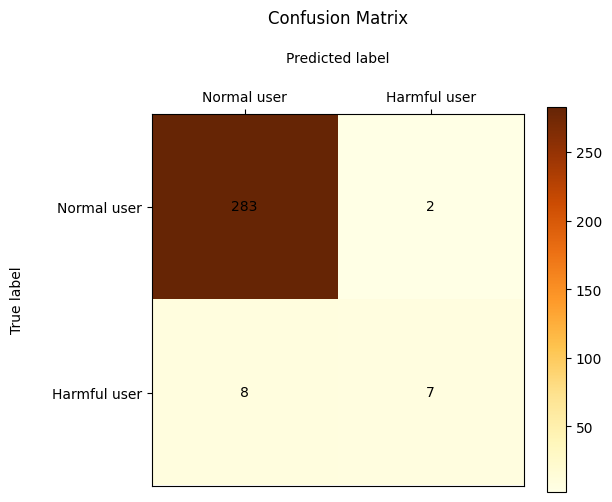

Confusion Matrix:
 [[283   2]
 [  8   7]]


In [19]:
def label_converter(label):
    if label == 0:
        return 'Normal user'
    elif label == 1:
        return 'Harmful user'

# Plot confusion matrix with numbers in boxes
plt.figure(figsize=(6, 5))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('YlOrBr'))

# Add numbers in boxes
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i][j]), ha='center', va='center', color='black')

# Add color bar
plt.colorbar()

# Add labels and title
plt.title('Confusion Matrix', pad=20)
plt.xlabel('Predicted label', labelpad=20)
plt.ylabel('True label', labelpad=20)

# Set ticks and labels
plt.xticks(ticks=[0, 1], labels=[label_converter(i) for i in range(2)])
plt.yticks(ticks=[0, 1], labels=[label_converter(i) for i in range(2)])

# Move x-labels to the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# Display the plot
plt.show()

# Print confusion matrix
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix: Rows are predicted labels and columns are true labels

| Metric    | Class 0 (Normal) | Class 1 (Harmful) | Weighted Average |
| --------- | ---------------- | ----------------- | ---------------- |
| Precision | 97.3%            | 77.8%             | 96.3%            |
| Recall    | 99.3%            | 46.7%             | 96.7%            |
| F1 Score  | 98.3%            | 58.3%             | 96.3%            |


Need to give weighted (overall reflection and also, class by class metric reflection)

In [20]:
class_names = ['Normal', 'Harmful']

precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

for i, class_name in enumerate(class_names):
    print(f"Class '{class_name}':")
    print(f"  Precision: {precision[i]:.3f}")
    print(f"  Recall:    {recall[i]:.3f}")
    print(f"  F1 Score:  {f1[i]:.3f}\n")

Class 'Normal':
  Precision: 0.973
  Recall:    0.993
  F1 Score:  0.983

Class 'Harmful':
  Precision: 0.778
  Recall:    0.467
  F1 Score:  0.583



In [21]:
# Weighted averages across all classes
precision_w = precision_score(y_test, y_pred, average='weighted')
recall_w = recall_score(y_test, y_pred, average='weighted')
f1_w = f1_score(y_test, y_pred, average='weighted')

print("Weighted averages:")
print(f"  Precision: {precision_w:.3f}")
print(f"  Recall:    {recall_w:.3f}")
print(f"  F1 Score:  {f1_w:.3f}")

Weighted averages:
  Precision: 0.963
  Recall:    0.967
  F1 Score:  0.963


In [50]:
feature_scores = pd.Series(rf_classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

late_hour_device_use                0.160563
filetype_zip                        0.086757
total_files_copied                  0.083254
avg_after_hours_browsing_per_day    0.073664
after_hours_logons                  0.065422
logon_std_dev_hours                 0.043239
avg_logon_time_hours                0.042922
filetype_txt                        0.039423
weekend_logons                      0.035268
avg_logoff_time_hours               0.031275
avg_files_copied_per_day            0.028310
unique_recipients_count             0.027716
after_hours_file_copy_ratio         0.027326
emails_sent_per_day                 0.024968
emails_sent_off_hours               0.024959
total_malicious_urls                0.024829
active_days                         0.023539
filetype_jpg                        0.022949
external_emails_ratio               0.016687
logons_on_other_user_pcs            0.016218
above_avg_daily_counter             0.016024
bcc_usage_rate                      0.015570
filetype_p

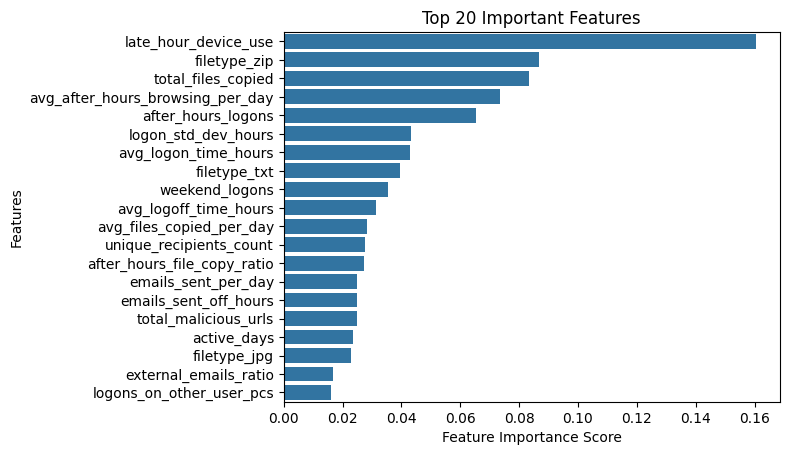

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Limit the number of features displayed
top_n = 20  # Display the top 20 most important features
top_features = feature_scores.nlargest(top_n)

# Create a horizontal bar plot
sns.barplot(x=top_features.values, y=top_features.index)

# Add labels and title
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Top 20 Important Features")


# Show the plot
plt.show()

LOGISTIC REGRESSION MODEL

In [41]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
lr_model = LogisticRegression(max_iter=5000, random_state=42)

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the performance of the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Print the accuracy
print("Logistic Regression Accuracy:", accuracy_lr)

Logistic Regression Accuracy: 0.97


/home/linuxbrew/.linuxbrew/opt/python@3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
precision_lr_w = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr_w = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr_w = f1_score(y_test, y_pred_lr, average='weighted')
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

print("Precision:", precision_lr_w)
print("Recall:", recall_lr_w)
print("F1 Score:", f1_lr_w)
print("Confusion Matrix:\n", conf_matrix_lr)

Precision: 0.9709947183098592
Recall: 0.97
F1 Score: 0.9704575089290776
Confusion Matrix:
 [[280   5]
 [  4  11]]


In [49]:
class_names = ['Normal', 'Harmful']

precision_lr = precision_score(y_test, y_pred_lr, average=None)
recall_lr = recall_score(y_test, y_pred_lr, average=None)
f1_lr = f1_score(y_test, y_pred_lr, average=None)

for i, class_name in enumerate(class_names):
    print(f"Class '{class_name}':")
    print(f"  Precision: {precision_lr[i]:.3f}")
    print(f"  Recall:    {recall_lr[i]:.3f}")
    print(f"  F1 Score:  {f1_lr[i]:.3f}\n")

Class 'Normal':
  Precision: 0.986
  Recall:    0.982
  F1 Score:  0.984

Class 'Harmful':
  Precision: 0.688
  Recall:    0.733
  F1 Score:  0.710



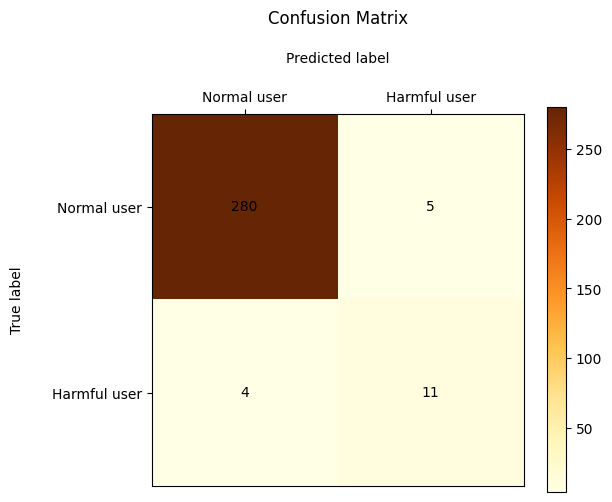

Confusion Matrix:
 [[280   5]
 [  4  11]]


In [46]:

plt.figure(figsize=(6, 5))
plt.imshow(conf_matrix_lr, interpolation='nearest', cmap=plt.get_cmap('YlOrBr'))

# Add numbers in boxes
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix_lr[i][j]), ha='center', va='center', color='black')

# Add color bar
plt.colorbar()

# Add labels and title
plt.title('Confusion Matrix', pad=20)
plt.xlabel('Predicted label', labelpad=20)
plt.ylabel('True label', labelpad=20)

# Set ticks and labels
plt.xticks(ticks=[0, 1], labels=[label_converter(i) for i in range(2)])
plt.yticks(ticks=[0, 1], labels=[label_converter(i) for i in range(2)])

# Move x-labels to the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# Display the plot
plt.show()

# Print confusion matrix
print("Confusion Matrix:\n", conf_matrix_lr)